# Importing libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Importing and reading dataset

In [2]:
supermarket = pd.read_csv("Supermart Grocery Sales - Retail Analytics Dataset.csv")


### Reading the first five rows of the dataset


In [3]:
supermarket.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Quarters,Order Year,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11/8/2017,4,2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11/8/2017,4,2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,6/12/2017,2,2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10/11/2016,4,2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10/11/2016,4,2016,South,2355,0.26,918.45,Tamil Nadu


### Reading the last five rows of the dataset

In [4]:
supermarket.tail()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Quarters,Order Year,Region,Sales,Discount,Profit,State
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,4,2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,7/12/2015,3,2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,6/6/2017,2,2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,4,2018,West,1659,0.15,597.24,Tamil Nadu
9993,OD9994,Ganesh,Food Grains,Atta & Flour,Tirunelveli,4/17/2018,2,2018,West,1034,0.28,165.44,Tamil Nadu


### Description of dataset

In [5]:
supermarket.describe()

,Quarters,Order Year,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2.882329,2016.722233,1496.596158,0.226817,374.937082
std,1.058086,1.123555,577.559036,0.074636,239.932881
min,1.000000,2015.000000,500.000000,0.100000,25.250000
25%,2.000000,2016.000000,1000.000000,0.160000,180.022500
50%,3.000000,2017.000000,1498.000000,0.230000,320.780000
75%,4.000000,2018.000000,1994.750000,0.290000,525.627500
max,4.000000,2018.000000,2500.000000,0.350000,1120.950000


### Information of dataset

In [6]:
supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Quarters       9994 non-null   int64  
 7   Order Year     9994 non-null   int64  
 8   Region         9994 non-null   object 
 9   Sales          9994 non-null   int64  
 10  Discount       9994 non-null   float64
 11  Profit         9994 non-null   float64
 12  State          9994 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 1015.1+ KB


### Checking for null values


In [7]:
supermarket.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Quarters         0
Order Year       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

### Viewing unique values

#### Financial Year's Ranging from 2015 to 2018

In [8]:
pd.DataFrame(supermarket['Order Year'].unique())

,0
0,2017
1,2016
2,2015
3,2018


#### The supermarket is spread about a total of 5 regions

In [9]:
pd.DataFrame(supermarket['Region'].unique())

,0
0,North
1,South
2,West
3,Central
4,East


#### The Supermarket is spread across 24 cities

In [10]:
pd.DataFrame(supermarket['City'].unique())

,0
0,Vellore
1,Krishnagiri
2,Perambalur
3,Dharmapuri
4,Ooty
5,Trichy
6,Ramanadhapuram
7,Tirunelveli
8,Chennai
9,Karur


#### There are total of 7 unique categories

In [11]:
pd.DataFrame(supermarket['Category'].unique())

,0
0,Oil & Masala
1,Beverages
2,Food Grains
3,Fruits & Veggies
4,Bakery
5,Snacks
6,"Eggs, Meat & Fish"


#### There are total of 23 unique sub categories

In [12]:
pd.DataFrame(supermarket['Sub Category'].unique())

,0
0,Masalas
1,Health Drinks
2,Atta & Flour
3,Fresh Vegetables
4,Organic Staples
5,Fresh Fruits
6,Biscuits
7,Cakes
8,Chocolates
9,Eggs


# Visualizations

### YoY Sales and Profit

In [13]:
YoYSalesProfit = supermarket[['Order Year','Sales','Profit']].groupby(['Order Year']).sum().sort_values('Sales',ascending=True)


In [14]:
YoYSalesProfit

,Sales,Profit
Order Year,,
2015,2975599,752529.11
2016,3131959,797192.99
2017,3871912,953216.22
2018,4977512,1244182.88


### Problem statement : Highest and lowest sales and profit 
#### The Highest sales and profit were recorded in 2018 i.e Sales =  4977512  Profit =  1244182.88
#### The lowest sales and profit were recorded in 2015 i.e Sales =  2975599 Profit =  752529.11

<AxesSubplot:title={'center':'YoY Sales and Profit'}, xlabel='Order Year', ylabel='Sales and Profit'>

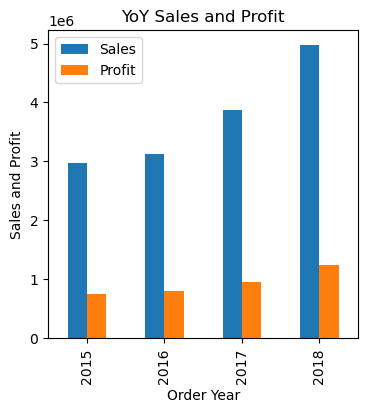

In [15]:
YoYSalesProfit.plot(kind='bar',figsize = (4,4),title= "YoY Sales and Profit",xlabel = "Order Year",ylabel= "Sales and Profit")

### YoY Quarterly Sales and Profit

In [16]:
QuarterSalesProfit = supermarket[['Order Year','Quarters','Sales','Profit']].groupby(['Order Year','Quarters']).sum().sort_values('Quarters',ascending=True)


#### Problem statement : Highest and lowest quarterly sales and profit
#### Lowest Sales were recorded in the 1st quarter of 2016 Over here it dipped from the first quarter in 2015
#### Highest sales were recorded in the 4th quarter of 2018 

In [17]:
QuarterSalesProfit

,,Sales,Profit
Order Year,Quarters,,
2015,1,435683,117293.22
2016,1,391996,102663.52
2017,1,503665,121612.13
2018,1,756710,184379.19
2015,2,573585,140919.51
2016,2,665382,169585.28
2017,2,871751,210517.97
2018,2,1032463,253393.77
2015,3,833347,203222.73


<AxesSubplot:title={'center':'Quarter Sales and Profit'}, xlabel='Quarters', ylabel='Sales and Profit'>

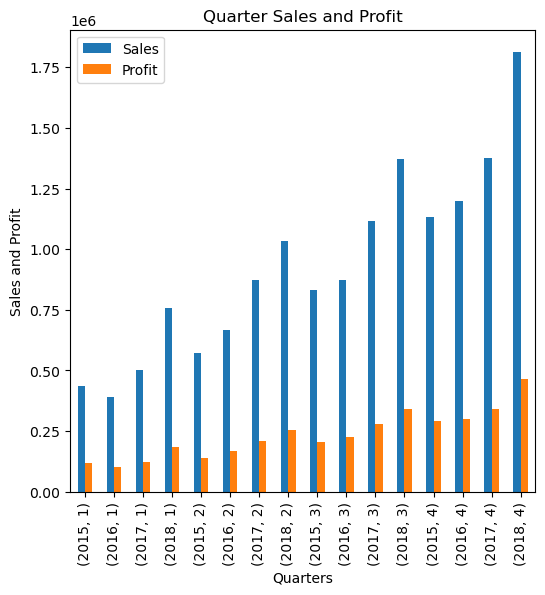

In [18]:
QuarterSalesProfit.plot(kind='bar',figsize = (6,6),title= "Quarter Sales and Profit",xlabel = "Quarters",ylabel= "Sales and Profit")

### YoY Discount and Sales

In [19]:
YoYDiscount = supermarket[['Order Year','Sales','Discount']].groupby(['Order Year']).sum().sort_values('Order Year',ascending=True)


#### Higher the discount , higher were the sales

In [20]:
YoYDiscount

,Sales,Discount
Order Year,,
2015,2975599,456.06
2016,3131959,477.91
2017,3871912,588.19
2018,4977512,744.65


### YoY Discount

In [49]:
YoYDiscount1 = supermarket[['Order Year','Discount']].groupby(['Order Year']).sum().sort_values('Order Year',ascending=True)


In [50]:
YoYDiscount1

,Discount
Order Year,
2015,456.06
2016,477.91
2017,588.19
2018,744.65


## Increasing the discount YoY
## Problem statement : Which year gave the highest discount
### Highest discount was given in 2018

array([<AxesSubplot:ylabel='Discount'>], dtype=object)

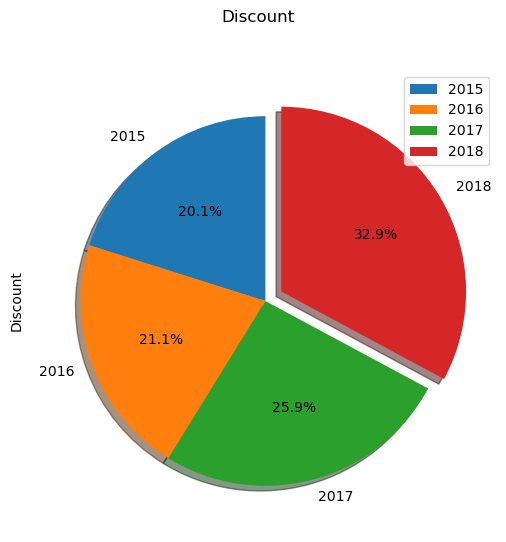

In [23]:
YoYDiscount1.plot(kind='pie',figsize = (6,6),title= "Discount",subplots = True , startangle = 90,shadow = True, autopct = "%1.1f%%",explode=(0,0,0,0.1)) 

### For Regional Sales and Profit

In [24]:
RegionSalesProfit = supermarket[['Region','Sales','Profit']].groupby(['Region']).sum().sort_values('Region',ascending=True)


In [25]:
RegionSalesProfit

,Sales,Profit
Region,,
Central,3468156,856806.84
East,4248368,1074345.58
North,1254,401.28
South,2440461,623562.89
West,4798743,1192004.61


### Problem statement : Which region has been the most profitbale 
#### West region has highest sales and profit 

<AxesSubplot:title={'center':'Sales and Profit By region'}, xlabel='Region', ylabel='Sales and Profit'>

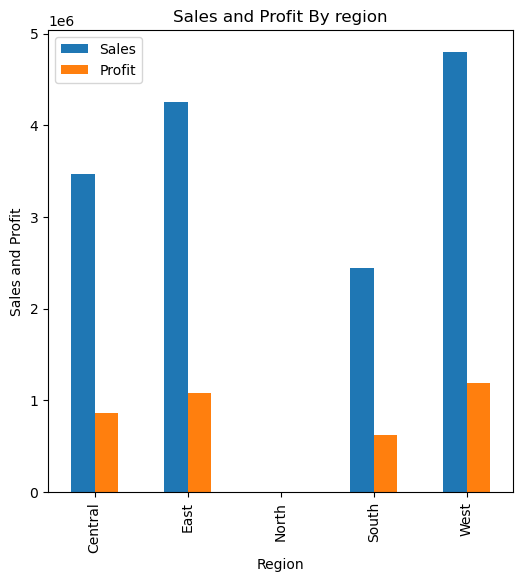

In [26]:
RegionSalesProfit.plot(kind='bar',figsize = (6,6),title= "Sales and Profit By region",xlabel = "Region",ylabel= "Sales and Profit")


### Category wise Sales and Profit by Year

In [27]:
CategorySalesProfit = supermarket[['Order Year','Category','Sales','Profit']].groupby(['Order Year','Category']).sum().sort_values('Category',ascending=True)


#### Among the all categories the highest sales and Profit were recorded by Snacks in the 2018 year

In [28]:
CategorySalesProfit

,,Sales,Profit
Order Year,Category,,
2015,Bakery,433979,107567.44
2018,Bakery,686074,174338.81
2017,Bakery,504263,122078.77
2016,Bakery,487965,124536.04
2015,Beverages,409091,104834.61
2017,Beverages,543575,135179.89
2018,Beverages,706928,175390.12
2016,Beverages,425719,110201.14
2017,"Eggs, Meat & Fish",565101,135896.22


<AxesSubplot:title={'center':'Sales and Profit By categories'}, xlabel='Category', ylabel='Sales and Profit'>

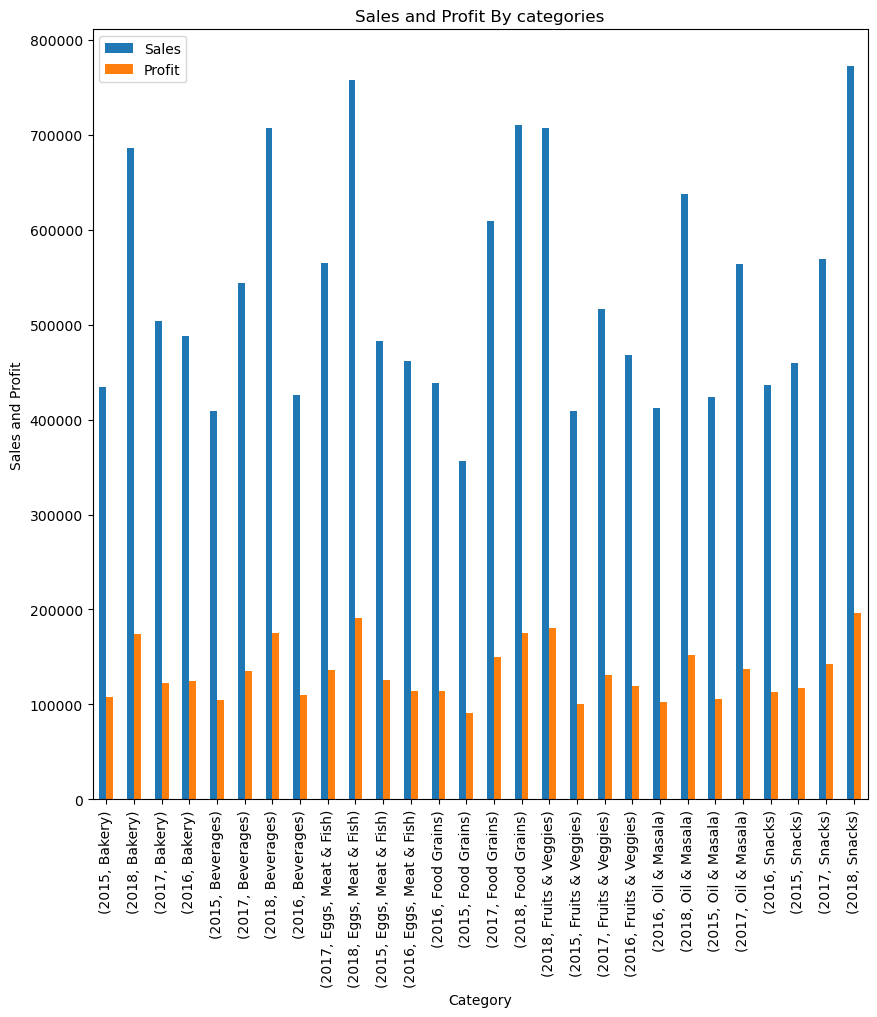

In [29]:
CategorySalesProfit.plot(kind='bar',figsize = (10,10),title= "Sales and Profit By categories",xlabel = "Category",ylabel= "Sales and Profit")

In [41]:
Category1 = supermarket[['Category','Sales']].groupby(['Category']).sum().sort_values('Category',ascending=True)


In [42]:
Category1

,Sales
Category,
Bakery,2112281
Beverages,2085313
"Eggs, Meat & Fish",2267401
Food Grains,2115272
Fruits & Veggies,2100727
Oil & Masala,2038442
Snacks,2237546


array([<AxesSubplot:ylabel='Sales'>], dtype=object)

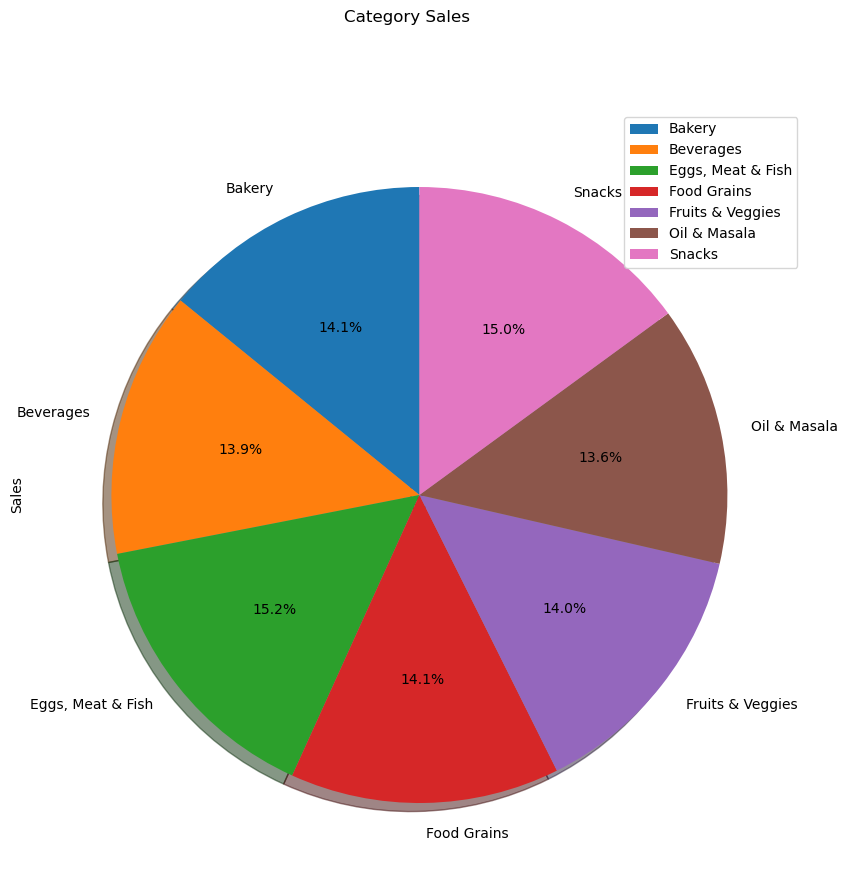

In [46]:
Category1.plot(kind='pie',figsize = (10,10),title= "Category Sales",subplots = True , startangle = 90,shadow = True, autopct = "%1.1f%%") 

### Catergory Count YoY

In [30]:
CategoryCount = supermarket[['Order Year','Category', 'Order ID']].groupby([ 'Category','Order Year']).count()[['Order ID']].sort_values('Category',ascending=True)


### Problem Statment : Highest Transactions in categories YoY
#### 2015 : Eggs, Meat & Fish
#### 2016 : Bakery
#### 2017 : Food Grains
#### 2018 : Snacks

In [31]:
CategoryCount

Order ID
Category          Order Year          
Bakery            2015             293
                  2016             316
                  2017             341
                  2018             463
Beverages         2015             274
                  2016             295
                  2017             369
                  2018             462
Eggs, Meat & Fish 2015             314
                  2016             306
                  2017             372
                  2018             498
Food Grains       2018             470
                  2017             395
                  2016             285
                  2015             248
Fruits & Veggies  2015             277
                  2016             313
                  2017             355
                  2018             473
Oil & Masala      2015             280
                  2016             282
                  2017             362
                  2018             437
Snacks            2015             307
                  2016             305
                  2017             393
                  2018             509

<AxesSubplot:title={'center':'Count f Categories'}, xlabel='Category', ylabel='Count'>

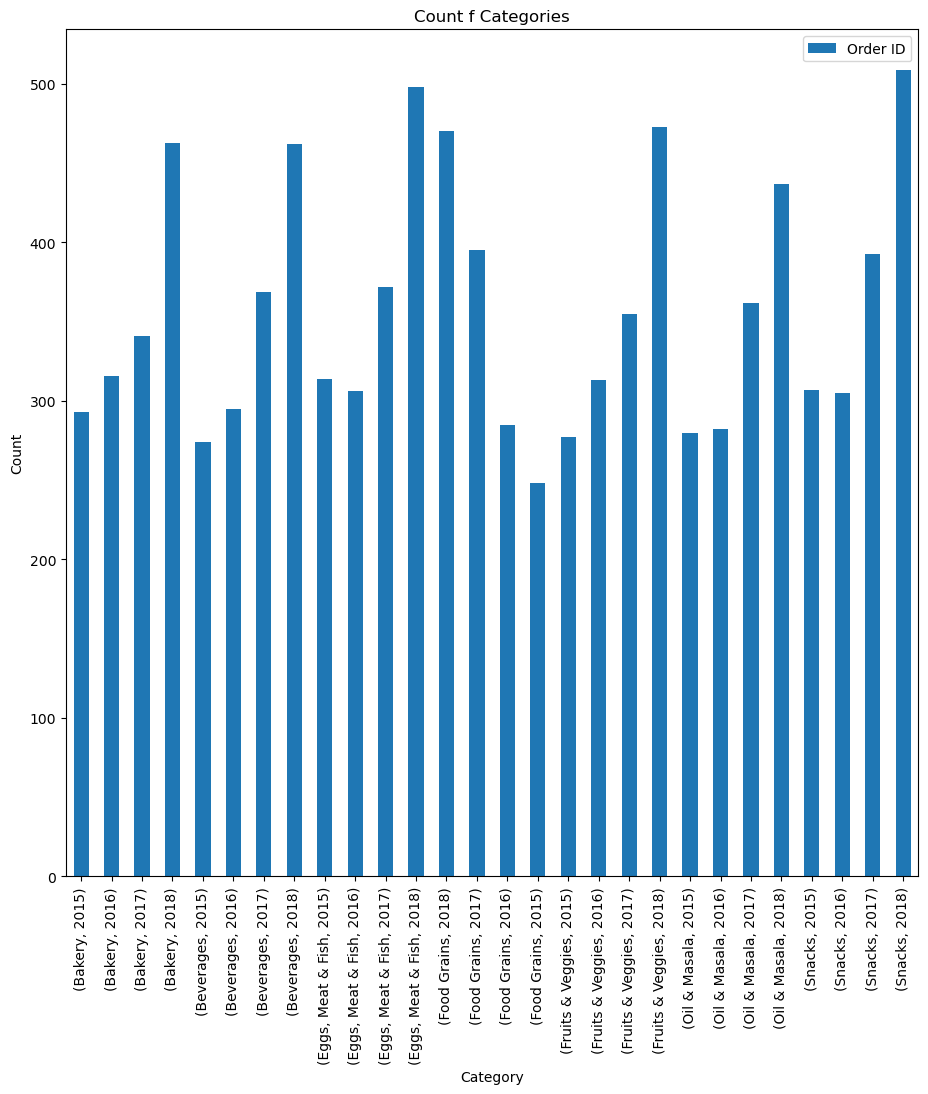

In [32]:
CategoryCount.plot(kind='bar',figsize = (11,11),title= "Count f Categories",xlabel = "Category",ylabel= "Count")

# Conclusion : A Detailed analysis showed that the sales and profit of the supermart in all the region has been increasing YoY Which happened due to increasing discount
# Thank You